# Budget - 2020 Budget Recommendations - Positions and Salaries


* **The Annual Appropriation Ordinance document is the final City operating budget as approved by the City Council. It reflects the City’s operating budget at the beginning of the fiscal year on January 1.**






* **The dataset details budgeted expenditures by department, appropriation account, and funding type.**




* **Responsible for preparing and executing the City's annual budget. The Office of Budget and Management evaluates the efficiency and efficacy of all City operations and drives management reforms that improve the City's fiscal condition and increase taxpayer value.**

In [1]:
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [2]:
budget_df = pd.read_csv('Budget rec.csv.csv')
budget_df

,FUND TYPE,DEPARTMENT CODE,DEPARTMENT DESCRIPTION,FUND CODE,FUND DESCRIPTION,ORGANIZATION CODE,ORGANIZATION DESCRIPTION,DIVISION CODE,DIVISION DESCRIPTION,SECTION CODE,...,SUB-SECTION DESCRIPTION,SCHEDULE / GRADE,BARGAINING UNIT,TITLE CODE,TITLE DESCRIPTION,BUDGETED UNIT,TOTAL BUDGETED UNIT,POSITION CONTROL,BUDGETED PAY RATE,TOTAL BUDGETED AMOUNT
0,LOCAL,1,Office of the Mayor,0100,Corporate Fund,1005,Office of the Mayor,2005,Office of the Mayor,3005,...,NaN,1 00,9,9901,Mayor,Annual,1,1,216210.0,216210.0
1,LOCAL,1,Office of the Mayor,0100,Corporate Fund,1005,Office of the Mayor,2005,Office of the Mayor,3005,...,NaN,1 00,9,9869,Senior Advisor to the Mayor,Annual,1,1,179160.0,179160.0
2,LOCAL,1,Office of the Mayor,0100,Corporate Fund,1005,Office of the Mayor,2005,Office of the Mayor,3005,...,NaN,1 00,9,9869,Senior Advisor to the Mayor,Annual,2,1,160008.0,320016.0
3,LOCAL,1,Office of the Mayor,0100,Corporate Fund,1005,Office of the Mayor,2005,Office of the Mayor,3005,...,NaN,1 00,9,9639,Assistant to Mayor,Annual,1,1,120000.0,120000.0
4,LOCAL,1,Office of the Mayor,0100,Corporate Fund,1005,Office of the Mayor,2005,Office of the Mayor,3005,...,NaN,1 00,9,9639,Assistant to Mayor,Annual,1,1,107016.0,107016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,CDBG,67,Department of Buildings,0J46,Community Development Block Grant Year XLVI,1005,Department of Buildings,2515,Strategic Task Force,3515,...,NaN,3 00,20,2123,Assistant Director of Conservation Inspections,Annual,1,1,112248.0,112248.0
7340,CDBG,67,Department of Buildings,0J46,Community Development Block Grant Year XLVI,1005,Department of Buildings,2515,Strategic Task Force,3515,...,NaN,B 15,1,1302,Administrative Services Officer II,Annual,1,1,113244.0,113244.0
7341,CDBG,67,Department of Buildings,0J46,Community Development Block Grant Year XLVI,1005,Department of Buildings,2515,Strategic Task Force,3515,...,NaN,B 10,1,0302,Administrative Assistant II,Annual,1,1,74568.0,74568.0
7342,CDBG,67,Department of Buildings,0J46,Community Development Block Grant Year XLVI,1005,Department of Buildings,2515,Strategic Task Force,3515,...,NaN,1 00,0,0044,Fringe Benefits,Annual,0,0,454945.0,454945.0


In [3]:
budget_df.dtypes

FUND TYPE                    object
DEPARTMENT CODE               int64
DEPARTMENT DESCRIPTION       object
FUND CODE                    object
FUND DESCRIPTION             object
ORGANIZATION CODE             int64
ORGANIZATION DESCRIPTION     object
DIVISION CODE                object
DIVISION DESCRIPTION         object
SECTION CODE                 object
SECTION DESCRIPTION          object
SUBSECTION CODE               int64
SUB-SECTION DESCRIPTION      object
SCHEDULE / GRADE             object
BARGAINING UNIT               int64
TITLE CODE                   object
TITLE DESCRIPTION            object
BUDGETED UNIT                object
TOTAL BUDGETED UNIT           int64
POSITION CONTROL              int64
BUDGETED PAY RATE           float64
TOTAL BUDGETED AMOUNT       float64
dtype: object

In [4]:
budget_df.describe()

,DEPARTMENT CODE,ORGANIZATION CODE,SUBSECTION CODE,BARGAINING UNIT,TOTAL BUDGETED UNIT,POSITION CONTROL,BUDGETED PAY RATE,TOTAL BUDGETED AMOUNT
count,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7.344000e+03,7.344000e+03
mean,55.713644,1015.231345,2182.421841,20.948938,397.539624,0.890523,8.255193e+04,4.295510e+05
std,22.797801,32.213708,2124.416468,29.564195,6954.514779,0.312258,1.404179e+05,3.158136e+06
min,1.000000,1005.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,38.000000,1005.000000,0.000000,1.000000,1.000000,1.000000,5.644800e+04,7.202400e+04
50%,57.000000,1005.000000,4003.000000,9.000000,1.000000,1.000000,8.184000e+04,1.006200e+05
75%,81.000000,1005.000000,4146.000000,20.000000,2.000000,1.000000,1.027590e+05,1.681080e+05
max,91.000000,1155.000000,4912.000000,99.000000,281004.000000,1.000000,8.898910e+06,1.137985e+08


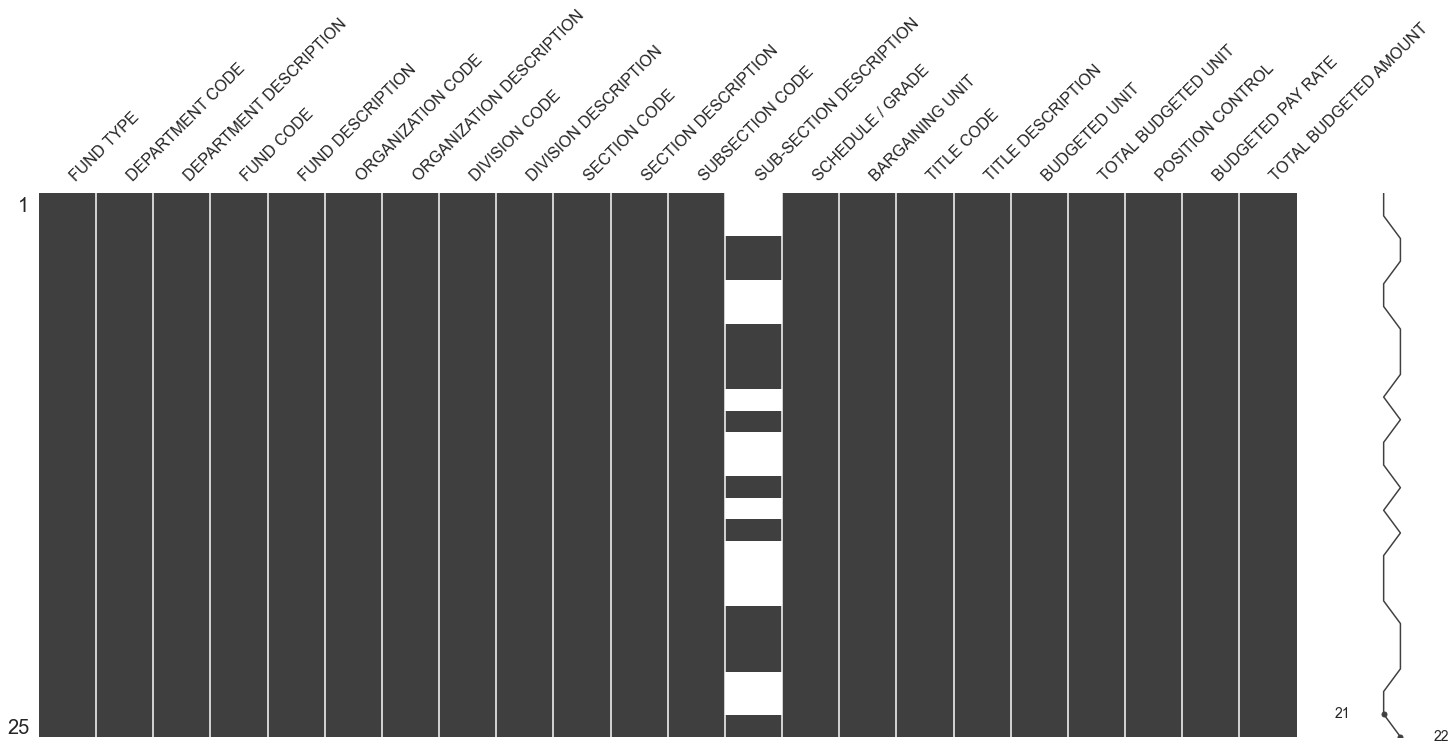

In [5]:
import missingno as msno

_=msno.matrix(budget_df.sample(25))

### There are null values in sub-section description.
### and unrequired columns 

In [6]:
 budget_df.drop(columns =[ 'DEPARTMENT CODE', 'FUND CODE', 'ORGANIZATION CODE', 'ORGANIZATION DESCRIPTION',
       'DIVISION CODE', 'DIVISION DESCRIPTION', 'SECTION CODE','SECTION DESCRIPTION','BUDGETED UNIT',
      'SUBSECTION CODE', 'SUB-SECTION DESCRIPTION',
       'SCHEDULE / GRADE', 'BARGAINING UNIT', 'TITLE CODE',
        'POSITION CONTROL' ],inplace= True)

In [7]:
# total units per department
dep_unit = budget_df.groupby(['DEPARTMENT DESCRIPTION']).agg({'TOTAL BUDGETED UNIT':'sum'})

C:\Users\Dell\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1330: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


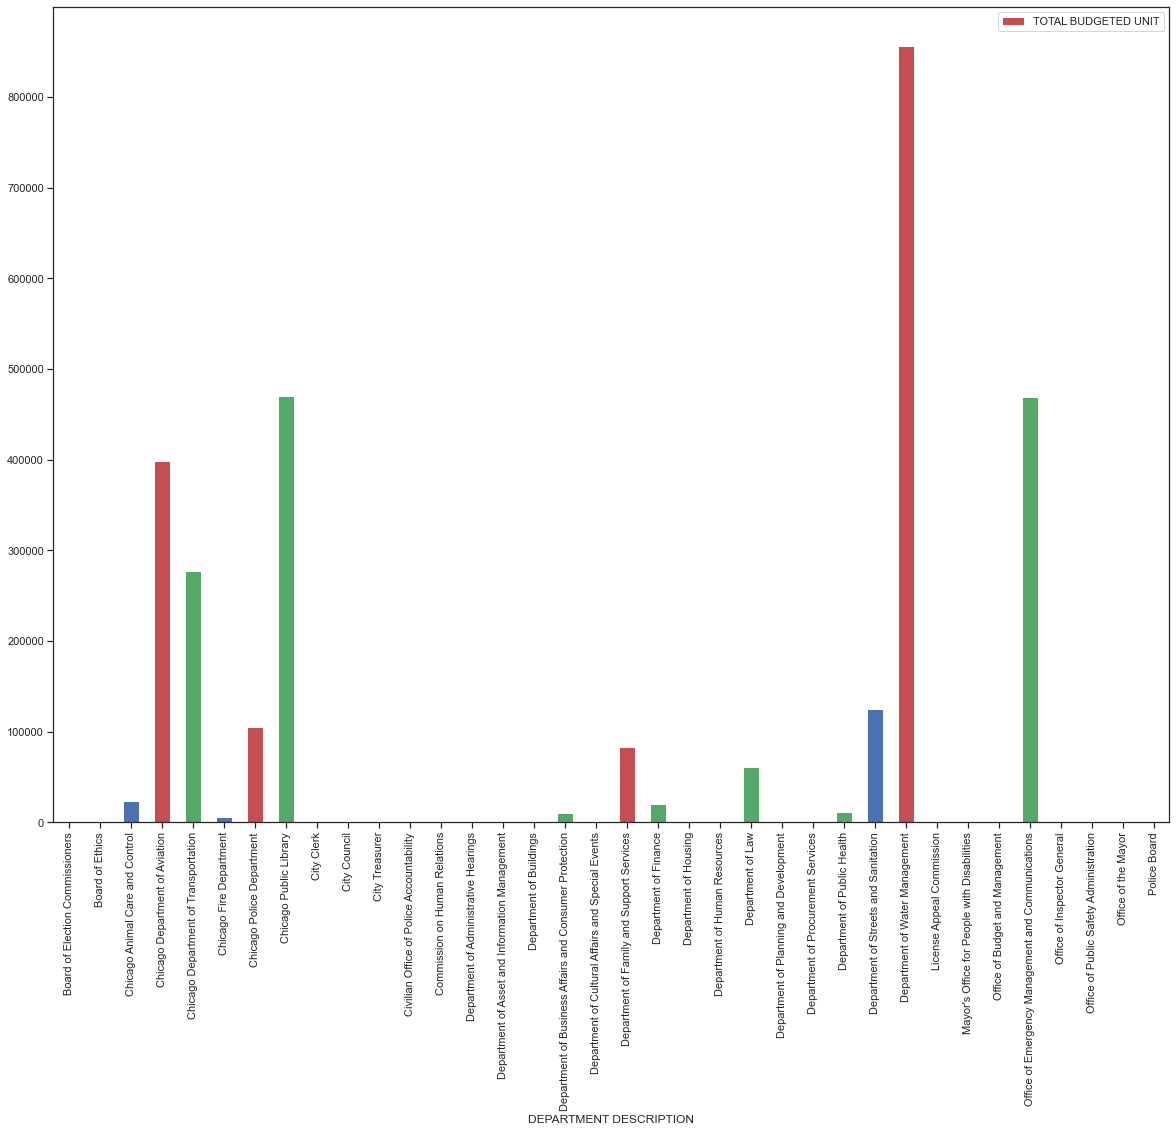

In [8]:
dep_unit.plot(kind = 'bar', figsize = (20,15),color = 'rgb')

## As we can see there are many departments in the which has a large number of units. 

In [9]:
top5_dep_unit =dep_unit.sort_values('TOTAL BUDGETED UNIT',ascending= False ).head(5)
top5_dep_unit

,TOTAL BUDGETED UNIT
DEPARTMENT DESCRIPTION,
Department of Water Management,856566
Chicago Public Library,470103
Office of Emergency Management and Communications,469352
Chicago Department of Aviation,398709
Chicago Department of Transportation,276514


C:\Users\Dell\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1330: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


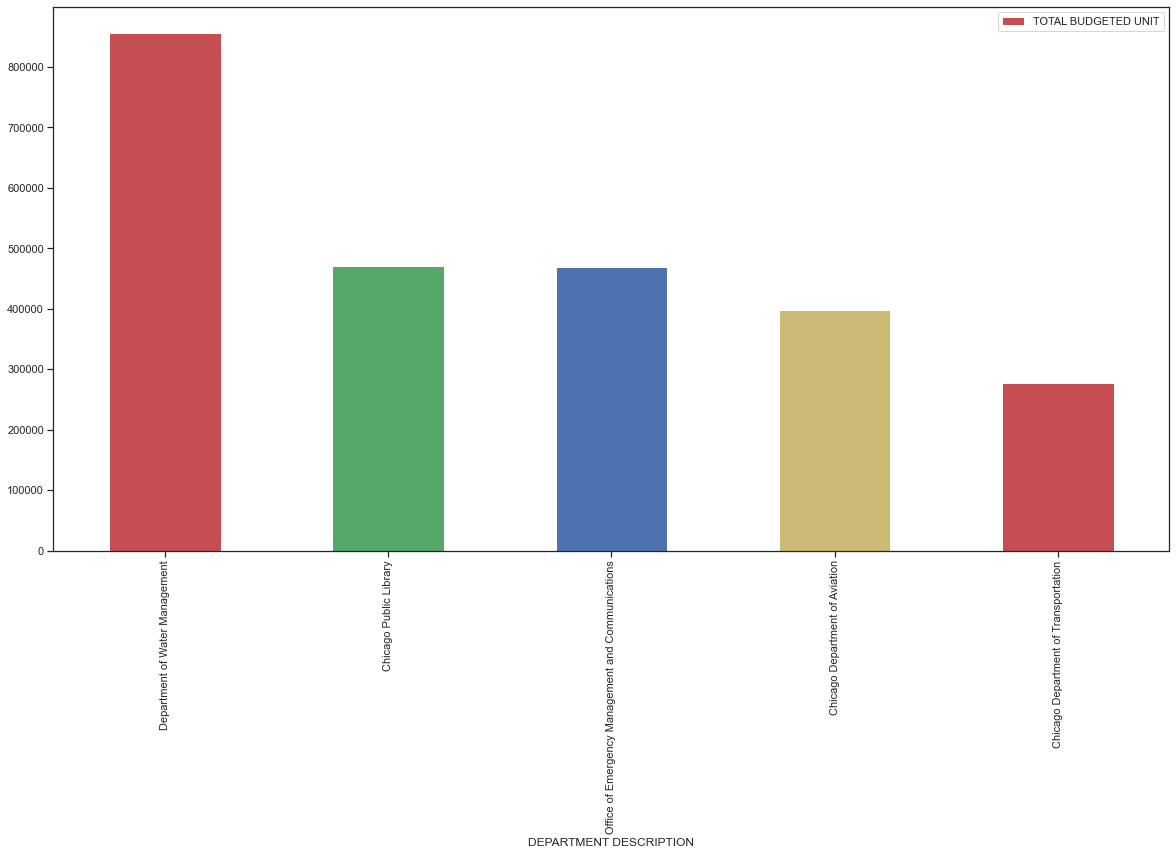

In [10]:
top5_dep_unit.plot(kind = 'bar', figsize = (20,10),color = 'rgby')

## The above listed are top 5 departments which has highest number of units.

In [11]:
dep_unit[dep_unit['TOTAL BUDGETED UNIT'] <=  397] # 397 is the mean value of budgeted units.

,TOTAL BUDGETED UNIT
DEPARTMENT DESCRIPTION,
Board of Election Commissioners,115
Board of Ethics,8
City Clerk,96
City Council,214
City Treasurer,30
Civilian Office of Police Accountability,151
Commission on Human Relations,19
Department of Administrative Hearings,41
Department of Buildings,284


In [12]:
dep_wise = budget_df.groupby(['DEPARTMENT DESCRIPTION']).agg({'TOTAL BUDGETED AMOUNT': 'mean'}).round(1)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1330: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


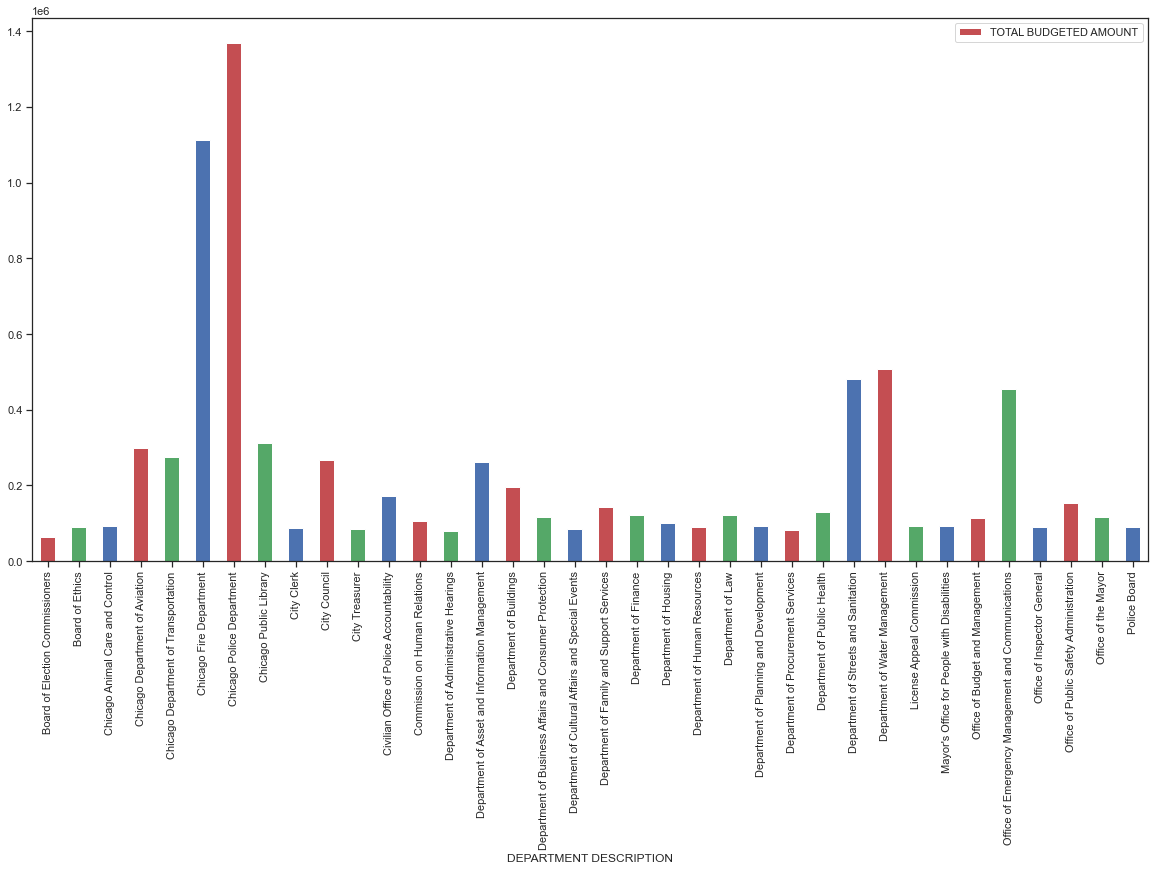

In [13]:
dep_wise.plot(kind = 'bar', figsize = (20,10),color = 'rgb')

In [14]:
top_5_dep =dep_wise.sort_values('TOTAL BUDGETED AMOUNT',ascending= False ).head(5)
top_5_dep

,TOTAL BUDGETED AMOUNT
DEPARTMENT DESCRIPTION,
Chicago Police Department,1367414.4
Chicago Fire Department,1113670.9
Department of Water Management,507145.7
Department of Streets and Sanitation,480786.5
Office of Emergency Management and Communications,454016.2


C:\Users\Dell\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1330: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


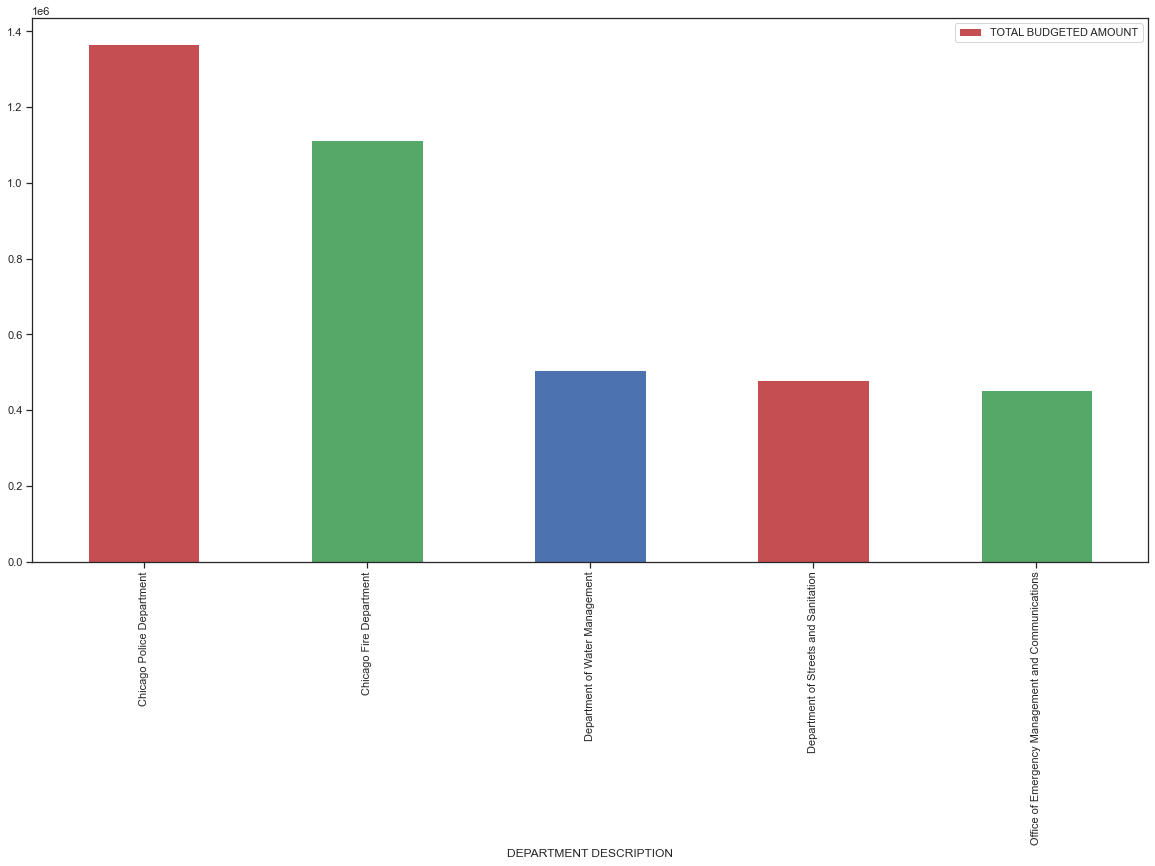

In [26]:
top_5_dep.plot(kind = 'bar', figsize = (20,10),color = 'rgb')

## Bottom 5 departments with respect to the budget

In [16]:
bottom_5_dep =dep_wise.sort_values('TOTAL BUDGETED AMOUNT',ascending= True ).head(5)
bottom_5_dep

,TOTAL BUDGETED AMOUNT
DEPARTMENT DESCRIPTION,
Board of Election Commissioners,64767.6
Department of Administrative Hearings,78939.5
Department of Procurement Services,82180.7
Department of Cultural Affairs and Special Events,84234.3
City Treasurer,84989.5


C:\Users\Dell\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1330: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


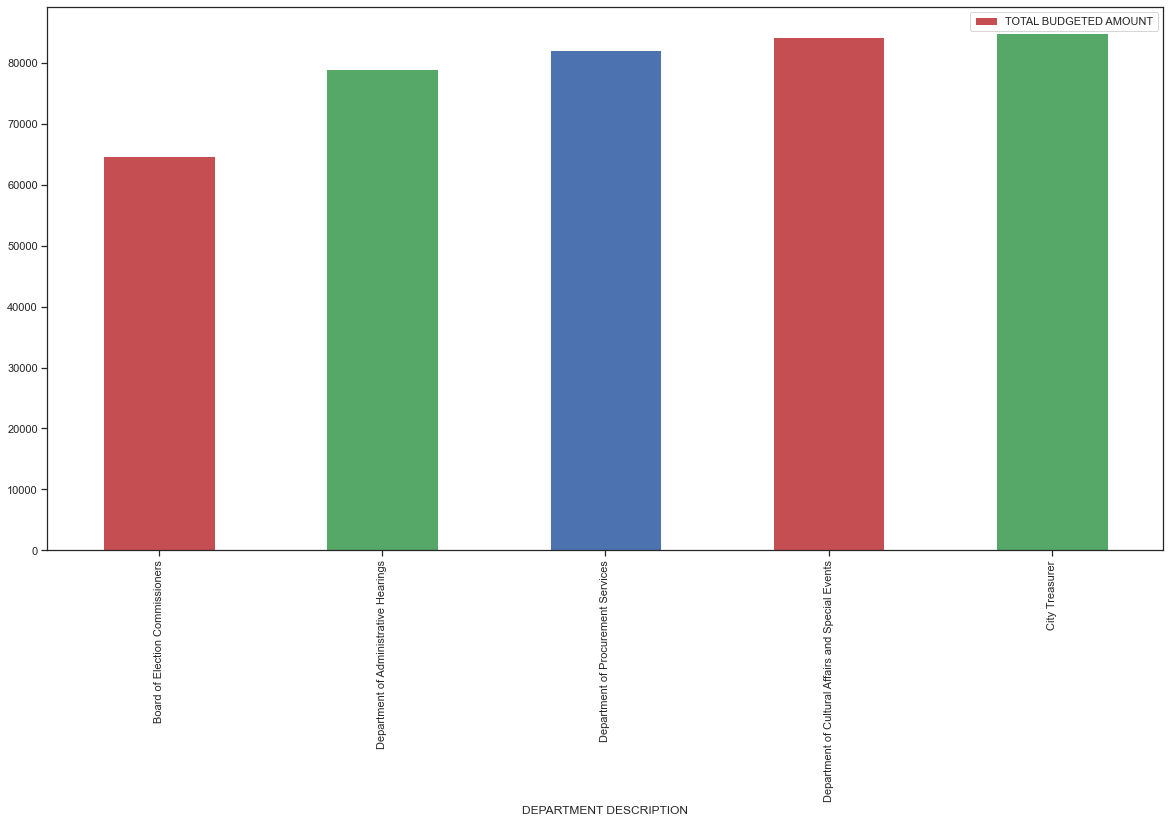

In [17]:
bottom_5_dep.plot(kind = 'bar', figsize = (20,10),color = 'rgb')

## Bottom 5 departments with respect to the budget 

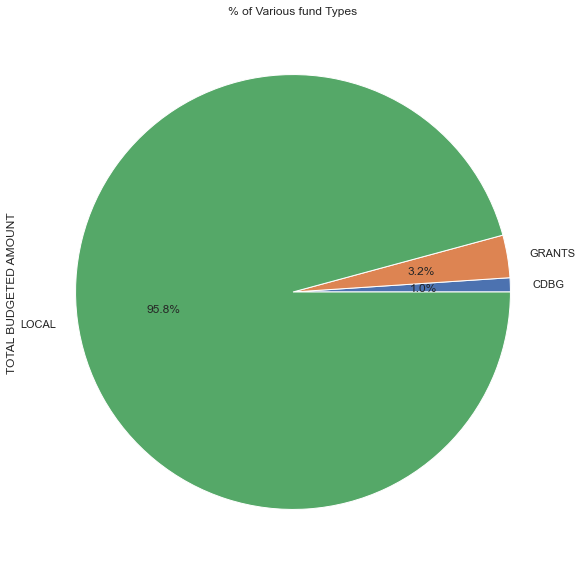

In [18]:
# plt.figure(2)
data = budget_df.groupby('FUND TYPE')["TOTAL BUDGETED AMOUNT"].sum()
data.plot.pie(autopct="%.1f%%",figsize = (10,10),title = '% of Various fund Types')



## The Pie Chart helps in the understanding that various types of local funding covers almost 96% of the Funding

In [19]:
corporate_fund = budget_df[budget_df['FUND DESCRIPTION']== 'Corporate Fund']
corporate_fund

,FUND TYPE,DEPARTMENT DESCRIPTION,FUND DESCRIPTION,TITLE DESCRIPTION,TOTAL BUDGETED UNIT,BUDGETED PAY RATE,TOTAL BUDGETED AMOUNT
0,LOCAL,Office of the Mayor,Corporate Fund,Mayor,1,216210.0,216210.0
1,LOCAL,Office of the Mayor,Corporate Fund,Senior Advisor to the Mayor,1,179160.0,179160.0
2,LOCAL,Office of the Mayor,Corporate Fund,Senior Advisor to the Mayor,2,160008.0,320016.0
3,LOCAL,Office of the Mayor,Corporate Fund,Assistant to Mayor,1,120000.0,120000.0
4,LOCAL,Office of the Mayor,Corporate Fund,Assistant to Mayor,1,107016.0,107016.0
...,...,...,...,...,...,...,...
4130,LOCAL,Chicago Department of Transportation,Corporate Fund,Bridge Operator,7,58488.0,409416.0
4131,LOCAL,Chicago Department of Transportation,Corporate Fund,Bridge Operator,1,55884.0,55884.0
4132,LOCAL,Chicago Department of Transportation,Corporate Fund,Bridge Operator,2,50880.0,101760.0
4133,LOCAL,Chicago Department of Transportation,Corporate Fund,Bridge Operator,2,48576.0,97152.0


In [20]:
corporate_fund.groupby(['DEPARTMENT DESCRIPTION']).agg({'TOTAL BUDGETED AMOUNT':'mean'}).round(0)

,TOTAL BUDGETED AMOUNT
DEPARTMENT DESCRIPTION,
Board of Election Commissioners,64768.0
Board of Ethics,88968.0
Chicago Animal Care and Control,92824.0
Chicago Department of Transportation,135003.0
Chicago Fire Department,1426744.0
Chicago Police Department,1406493.0
City Clerk,85504.0
City Council,268132.0
City Treasurer,97968.0


## We can see here the value addition through corporate funds in government.

In [21]:
officofmayor =  budget_df[budget_df['DEPARTMENT DESCRIPTION']== 'Office of the Mayor']
graph = officofmayor.nlargest(10,'BUDGETED PAY RATE')
graph

,FUND TYPE,DEPARTMENT DESCRIPTION,FUND DESCRIPTION,TITLE DESCRIPTION,TOTAL BUDGETED UNIT,BUDGETED PAY RATE,TOTAL BUDGETED AMOUNT
0,LOCAL,Office of the Mayor,Corporate Fund,Mayor,1,216210.0,216210.0
16,LOCAL,Office of the Mayor,Corporate Fund,Chief of Staff,1,195000.0,195000.0
1,LOCAL,Office of the Mayor,Corporate Fund,Senior Advisor to the Mayor,1,179160.0,179160.0
66,LOCAL,Office of the Mayor,Corporate Fund,Director of Intergovernmental Affairs,1,175092.0,175092.0
18,LOCAL,Office of the Mayor,Corporate Fund,First Deputy Chief of Staff,1,169992.0,169992.0
40,LOCAL,Office of the Mayor,Corporate Fund,Chief Financial Officer,1,169992.0,169992.0
28,LOCAL,Office of the Mayor,Corporate Fund,Communications Director,1,165000.0,165000.0
42,LOCAL,Office of the Mayor,Corporate Fund,Deputy Chief of Staff,1,165000.0,165000.0
52,LOCAL,Office of the Mayor,Corporate Fund,Deputy Mayor,1,165000.0,165000.0
56,LOCAL,Office of the Mayor,Corporate Fund,Deputy Mayor,1,165000.0,165000.0


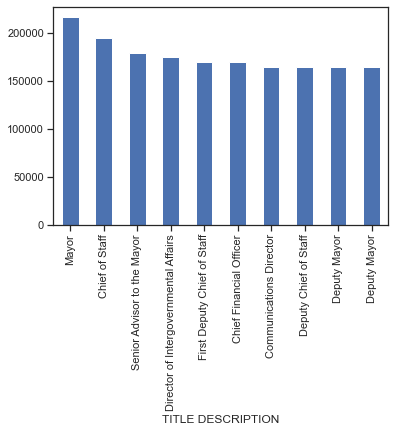

In [22]:
graph.plot(kind = 'bar', x = 'TITLE DESCRIPTION', y = 'BUDGETED PAY RATE', legend = None)

### In the office of mayor has the highest bugdeted payrate in the top 10 payrates. 

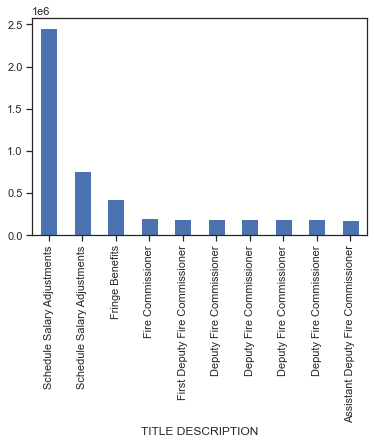

In [23]:
Chicago_Fire_Department = budget_df[budget_df['DEPARTMENT DESCRIPTION']== 'Chicago Fire Department']
graph2 = Chicago_Fire_Department.nlargest(10,'BUDGETED PAY RATE')
graph2.plot(kind = 'bar', x = 'TITLE DESCRIPTION', y = 'BUDGETED PAY RATE', legend = None)

### In the Chicago fire department schedule salary adjustments has the highest bugdeted payrates. 

## Top 10 total budget amounts

In [24]:
budget_df.nlargest(10,'TOTAL BUDGETED AMOUNT')

,FUND TYPE,DEPARTMENT DESCRIPTION,FUND DESCRIPTION,TITLE DESCRIPTION,TOTAL BUDGETED UNIT,BUDGETED PAY RATE,TOTAL BUDGETED AMOUNT
2373,LOCAL,Chicago Police Department,Corporate Fund,Police Officer,1219,93354.0,113798526.0
2376,LOCAL,Chicago Police Department,Corporate Fund,Police Officer,1348,84054.0,113304792.0
2374,LOCAL,Chicago Police Department,Corporate Fund,Police Officer,1200,90024.0,108028800.0
2375,LOCAL,Chicago Police Department,Corporate Fund,Police Officer,949,87006.0,82568694.0
2379,LOCAL,Chicago Police Department,Corporate Fund,Police Officer,1125,72510.0,81573750.0
2378,LOCAL,Chicago Police Department,Corporate Fund,Police Officer,703,76266.0,53614998.0
3124,LOCAL,Chicago Fire Department,Corporate Fund,Firefighter - EMT,520,92274.0,47982480.0
2372,LOCAL,Chicago Police Department,Corporate Fund,Police Officer,456,96060.0,43803360.0
2377,LOCAL,Chicago Police Department,Corporate Fund,Police Officer,470,80016.0,37607520.0
2380,LOCAL,Chicago Police Department,Corporate Fund,Police Officer,524,68616.0,35954784.0


## we can see that top 10 total budget amount are mostly going to police officers comparing all the departments.

## Top 10 budget pay rates 

In [25]:
# budget_df[budget_df['TOTAL BUDGETED AMOUNT'] == budget_df['TOTAL BUDGETED AMOUNT'].max(5)]
budget_df.nlargest(10,'BUDGETED PAY RATE')

,FUND TYPE,DEPARTMENT DESCRIPTION,FUND DESCRIPTION,TITLE DESCRIPTION,TOTAL BUDGETED UNIT,BUDGETED PAY RATE,TOTAL BUDGETED AMOUNT
2417,LOCAL,Chicago Police Department,Corporate Fund,Schedule Salary Adjustments,0,8898910.0,8898910.0
6994,GRANTS,Department of Family and Support Services,Area Plan on Aging,Fringe Benefits,0,2843691.0,2843691.0
3165,LOCAL,Chicago Fire Department,Corporate Fund,Schedule Salary Adjustments,0,2454150.0,2454150.0
7041,GRANTS,Department of Family and Support Services,Head Start and Early Head Start,Fringe Benefits,0,2280741.0,2280741.0
7109,GRANTS,Chicago Public Library,Illinois Library Development - Per Capita and ...,Fringe Benefits,0,2129676.0,2129676.0
5381,LOCAL,Office of Emergency Management and Communications,Emergency Communication Fund,Contract Wage Increment - Salary,0,2048564.0,2048564.0
6922,GRANTS,Department of Family and Support Services,Community Services Block Grant,Fringe Benefits,0,1886826.0,1886826.0
7237,CDBG,Department of Public Health,Community Development Block Grant Year XLVI,Fringe Benefits,0,1820260.0,1820260.0
7283,CDBG,Department of Buildings,Community Development Block Grant Year XLVI,Fringe Benefits,0,1633714.0,1633714.0
6558,GRANTS,Department of Public Health,Public Health Emergency Preparedness (PHEP),Fringe Benefits,0,1620668.0,1620668.0


## we can see that top 10 budget payrates are going into benifits and salary adjustments for all the departments. 
